In [1]:
import pandas as pd
import py3Dmol as pymol
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
import heatmapper as heat
import nglview as nv
import webbrowser

rbd_segid_6m0j = 'E'
rbd_segid_7z0x = 'R'

ace2_segid_6m0j = 'A'

fab_segid1_7z0x = 'H'
fab_segid2_7z0x = 'L'

rbm_resid_range = range(438,506)
ace2_bind_site_range = range(0,85)

s_protein_rbd_colour = '#f65fab'
ace2_receptor_colour = '#4aa6ff'
fab_mon_1_colour = '#45c4c2'
fab_mon_2_colour = '#51c445'

Preliminary analysis of binding sites
===

6M0J
===
CRYSTAL STRUCTURE OF SARS-COV-2 SPIKE RECEPTOR-BINDING DOMAIN BOUND WITH ACE2\
\
A preliminary look at the binding region can be taken fairly easily for the 6M0J structure as S protein - ACE2 binding is at this point fairly well detailed.\
Becasue of this, the RBM region (S protein) and N-terminal helix (ACE2) can be used as an initial binding region to examine.

In [2]:
view_6m0j = pymol.view(width=1600, height=800, viewergrid=(1,3), query='pdb:6m0j')

view_6m0j.setStyle({'chain':rbd_segid_6m0j},{'cartoon':{'color':s_protein_rbd_colour}}, viewer=(0,0))
view_6m0j.setStyle({'chain':ace2_segid_6m0j},{'cartoon':{'color':ace2_receptor_colour}}, viewer=(0,0))
view_6m0j.addLabel('RBM (pink) - ACE2 (blue) binding', {'fontColor': 'black', 'backgroundColor': 'white', 'position': {'x': 100, 'y': 100, 'z': 100}, 'fontSize': 12}, {'chain':ace2_segid_6m0j,'resi':20}, viewer=(0,0))

rbd_contacting_selection = {
    'chain': 'E',
    'within': {'distance': 15, 'sel': {'chain': ace2_segid_6m0j}}
}
view_6m0j.setStyle(rbd_contacting_selection,{'cartoon':{'color':s_protein_rbd_colour}}, viewer=(0,1))

ace2_contacting_selection = {
    'chain': ace2_segid_6m0j,
    'within': {'distance': 15, 'sel': {'chain': 'E'}}
}
view_6m0j.setStyle(ace2_contacting_selection,{'cartoon':{'color':ace2_receptor_colour}}, viewer=(0,1))
view_6m0j.addLabel('Residues within 1.5nm of each chain', {'fontColor': 'black', 'backgroundColor': 'white', 'position': {'x': 100, 'y': 100, 'z': 100}, 'fontSize': 12}, {'chain':ace2_segid_6m0j,'resi':20}, viewer=(0,1))

rbm_residue_numbers = list(range(437,508))
view_6m0j.setStyle({'chain':'E','resi':rbm_residue_numbers},{'cartoon':{'color':s_protein_rbd_colour}}, viewer=(0,2))
ace2_nterm_residue_numbers = list(range(20,85))
view_6m0j.setStyle({'chain':ace2_segid_6m0j,'resi':ace2_nterm_residue_numbers},{'cartoon':{'color':ace2_receptor_colour}}, viewer=(0,2))
view_6m0j.addLabel('Proposed binding regions', {'fontColor': 'black', 'backgroundColor': 'white', 'position': {'x': 100, 'y': 100, 'z': 100}, 'fontSize': 12}, {'chain':ace2_segid_6m0j,'resi':20}, viewer=(0,2))

view_6m0j.addSurface(pymol.VDW, {'opacity':0.5}, viewer=(0,0))
view_6m0j.addSurface(pymol.VDW, {'opacity':0.5}, viewer=(0,1))
view_6m0j.addSurface(pymol.VDW, {'opacity':0.5}, viewer=(0,2))

view_6m0j.zoomTo()
view_6m0j.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

7Z0X
===
THSC20.HVTR26 FAB BOUND TO SARS-COV-2 RECEPTOR BINDING DOMAIN\
\
The binding region of FAB is less well defined.\
This binding pocket is formed from a series of loops which compose the pocket walls.\
This pocket appears to surround the tip of the S protein RBM.


In [3]:
view_7z0x = pymol.view(width=1500, height=600, viewergrid=(1,3), query='pdb:7z0x')

# Viewer left panel
# Show entire protein chains
view_7z0x.setStyle({'chain':'R'},{'cartoon':{'color':s_protein_rbd_colour}}, viewer=(0,0))
view_7z0x.setStyle({'chain':fab_segid1_7z0x},{'cartoon':{'color':fab_mon_1_colour}}, viewer=(0,0))
view_7z0x.setStyle({'chain':fab_segid2_7z0x},{'cartoon':{'color':fab_mon_2_colour}}, viewer=(0,0))
view_7z0x.addLabel('RBM (pink) - FAB (green) binding', {'fontColor': 'black', 'backgroundColor': 'white', 'position': {'x': 100, 'y': 100, 'z': 100}, 'fontSize': 12}, {'chain':ace2_segid_6m0j,'resi':20}, viewer=(0,0))

# Viewer centre panel
# Contact region on RBM (from FAB)
rbd_contacting_H_selection = {
    'chain': 'R',
    'within': {'distance': 15, 'sel': {'chain': fab_segid1_7z0x,'chain':fab_segid2_7z0x}}
}
view_7z0x.setStyle(rbd_contacting_H_selection,{'cartoon':{'color':s_protein_rbd_colour}}, viewer=(0,1))

# Contact region on FAB monomer H (from RBM)
fab_H_contacting_selection = {
    'chain': fab_segid1_7z0x,
    'within': {'distance': 15, 'sel': {'chain': 'R'}}
}
view_7z0x.setStyle(fab_H_contacting_selection,{'cartoon':{'color':fab_mon_1_colour}}, viewer=(0,1))

# Contact region on FAB monomer L (from RBM)
fab_L_contacting_selection = {
    'chain': fab_segid2_7z0x,
    'within': {'distance': 15, 'sel': {'chain': 'R'}}
}
view_7z0x.setStyle(fab_L_contacting_selection,{'cartoon':{'color':fab_mon_2_colour}}, viewer=(0,1))
view_7z0x.addLabel('Residues within 1.5nm of each chain', {'fontColor': 'black', 'backgroundColor': 'white', 'position': {'x': 100, 'y': 100, 'z': 100}, 'fontSize': 12}, {'chain':ace2_segid_6m0j,'resi':20}, viewer=(0,1))

# Viewer right panel
rbm_fab_bound_residue_numbers = list(range(470,490))
view_7z0x.setStyle({'chain':'R','resi':rbm_fab_bound_residue_numbers},{'cartoon':{'color':s_protein_rbd_colour}}, viewer=(0,2))

fab_mon_1_pocket_loop_residue_numbers = list(range(30,65)) + list(range(95,105))
view_7z0x.setStyle({'chain':fab_segid1_7z0x,'resi':fab_mon_1_pocket_loop_residue_numbers},{'cartoon':{'color':fab_mon_1_colour}}, viewer=(0,2))

fab_mon_2_pocket_loop_residue_numbers = list(range(25,55)) + list(range(85,100))
view_7z0x.setStyle({'chain':fab_segid2_7z0x,'resi':fab_mon_2_pocket_loop_residue_numbers},{'cartoon':{'color':fab_mon_2_colour}}, viewer=(0,2))
view_7z0x.addLabel('Proposed binding regions', {'fontColor': 'black', 'backgroundColor': 'white', 'position': {'x': 100, 'y': 100, 'z': 100}, 'fontSize': 12}, {'chain':ace2_segid_6m0j,'resi':20}, viewer=(0,2))

# Show opaque VDW structure
view_7z0x.addSurface(pymol.VDW, {'opacity':0.5}, viewer=(0,0))
view_7z0x.addSurface(pymol.VDW, {'opacity':0.5}, viewer=(0,1))
view_7z0x.addSurface(pymol.VDW, {'opacity':0.5}, viewer=(0,2))

view_7z0x.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Notes
===
- The RBD of the S protein has significantly better contact to the ACE2 receptor (6M0J) binding site than THSC20.HVTR26 FAB (7Z0X).
- The RBM section of the RBD has significant contact to the binding region of ACE2 along the entire face of the N-terminal helix.
- The binding of FAB is specifically located at the tip of the RBM in a pocket on the antibody.
- Analysing the residues present in the binding regions will describe hydrophilic/hydrophobic and electrostatic characteristics of the binding.
- Specificity in the binding between the RBM tip and the binding pocket of FAB could suggest a simple way of removing interaction.

===============================================================================

Residues composing the binding regions
===
- The residues composing the binding region will characterise the properties of the interaction.
- A large representation of hydrophilic or hydrophobic residues in the region may suggest a driving force to the binding event.
- This is also true for charged residue representations.

In [4]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

# Functions and variables

def count_resname_occourances(resname_list : list):
    resname_list = list(resname_list)
    resnames_set = list(set(resname_list))
    resname_counts = [resname_list.count(str(x)) for x in resnames_set]
    return [resnames_set,resname_counts]

def create_residue_composition_graph(x : list, y : list, title : str, xlabel : str, ylabel : str):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.barh(x,y)
    return plt.barh

def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

pbd_6m0j_path = './6m0j.pdb'
pbd_7z0x_path = './7z0x.pdb'

# SMILES structures
smiles_dict = {}
smiles_dict['ser'] = 'C([C@@H](C(=O)O)N)O'
smiles_dict['asn'] = 'O=C(N)C[C@H](N)C(=O)O'
smiles_dict['gly'] = 'C(C(=O)O)N'
smiles_dict['tyr'] = 'N[C@@H](Cc1ccc(O)cc1)C(O)=O'
smiles_dict['leu'] = 'CC(C)C[C@@H](C(=O)O)N'
smiles_dict['phe'] = 'c1ccc(cc1)C[C@@H](C(=O)O)N'
smiles_dict['pro'] = 'C1C[C@H](NC1)C(=O)O'

6M0J
===

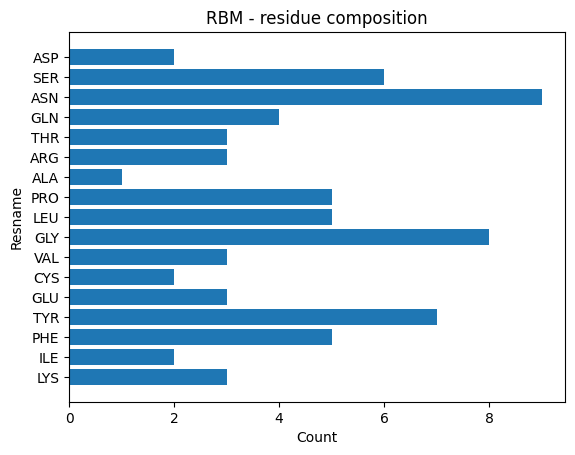

In [5]:
u_6m0j = mda.Universe(pbd_6m0j_path)

# RBM as defined in...
# Structure of the SARS-CoV-2 spike receptor-binding domain bound to the ACE2 receptor
# by Lan et al.
rbm_residue_numbers_str = ' '.join([str(x) for x in rbm_residue_numbers])
s_pro_rbm = u_6m0j.select_atoms('protein and segid E and resid '+rbm_residue_numbers_str)
plot_data = count_resname_occourances(s_pro_rbm.residues.resnames)
s_pro_rbm_res_comp = create_residue_composition_graph(plot_data[0],plot_data[1],'RBM - residue composition','Count','Resname')

- ASN, TYR and ASN are some of the most significantly represented residue and represent a polar character to the RBM.
- PHE is less significantly represented however suggests further aromatic character along with TYR.
- GLY and PRO are also significantly represnted and are non-polar, however these are generally structural.
- LEU is also significant and non-polar.

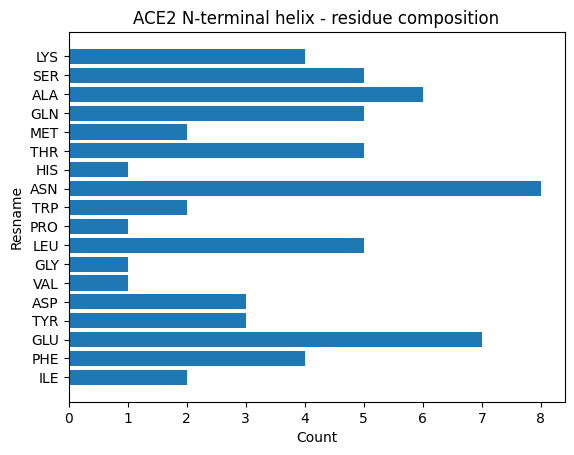

In [6]:
ace2_residue_numbers_str = ' '.join([str(x) for x in ace2_nterm_residue_numbers])
ace2_nterm = u_6m0j.select_atoms('protein and segid A and resid '+ace2_residue_numbers_str)
plot_data = count_resname_occourances(ace2_nterm.residues.resnames)
s_pro_rbm_res_comp = create_residue_composition_graph(plot_data[0],plot_data[1],'ACE2 N-terminal helix - residue composition','Count','Resname')

- ASN is also significant in the ACE2 N-terminal helix, suggesting that the RBM is exploiting the polar character of the binding site.
- GLU is negatively charged at physiological pH and THR, SER and GLN are polar, suggesting a polar binding site with negative charge.
- LEU is also present as in the RBM which may provide a hydrophobic character to the binding interaction.

7Z0X
===

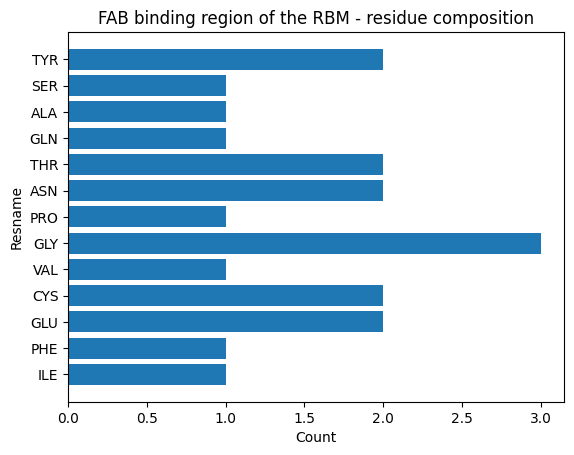

In [7]:
u_7z0x = mda.Universe(pbd_7z0x_path)

rbm_fab_bound_residue_numbers_str = ' '.join([str(x) for x in rbm_fab_bound_residue_numbers])
s_pro_rbm_fab_bound = u_6m0j.select_atoms('protein and segid E and resid '+rbm_fab_bound_residue_numbers_str)
plot_data = count_resname_occourances(s_pro_rbm_fab_bound.residues.resnames)
s_pro_rbm_res_comp = create_residue_composition_graph(plot_data[0],plot_data[1],'FAB binding region of the RBM - residue composition','Count','Resname')

- There is a large representation of GLY which is non-polar but very small and will likely not contribute significantly to the binding interaction.
- THR, ASN, CYS, GLU and TYR expression suggest that the binding point on the tip of the RBM is polar and negatively charged for the same reasons as mentioned previosuly.

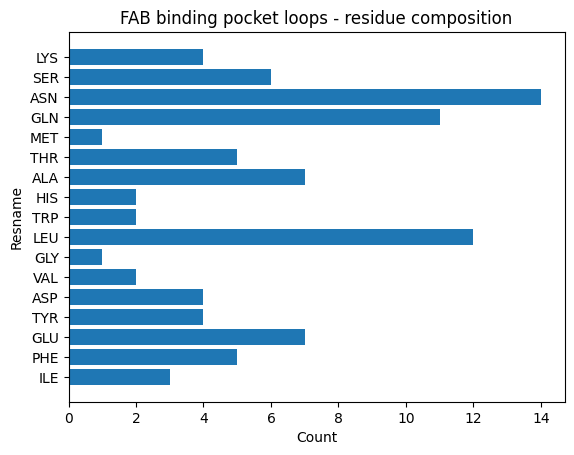

In [8]:
fab_mon_1_residue_numbers_str = ' '.join([str(x) for x in fab_mon_1_pocket_loop_residue_numbers])
fab_mon_1 = u_6m0j.select_atoms('protein and segid A and resid '+fab_mon_1_residue_numbers_str)

fab_mon_2_residue_numbers_str = ' '.join([str(x) for x in fab_mon_2_pocket_loop_residue_numbers])
fab_mon_2 = u_6m0j.select_atoms('protein and segid A and resid '+fab_mon_2_residue_numbers_str)

plot_data = count_resname_occourances(list(fab_mon_1.residues.resnames)+list(fab_mon_2.residues.resnames))
s_pro_rbm_res_comp = create_residue_composition_graph(plot_data[0],plot_data[1],'FAB binding pocket loops - residue composition','Count','Resname')

- A large representation of ASN suggests that the RBM tip is binding to FAB through specifically polar binding site on the RBM tip.
- LEU and GLN are also significant at this point, suggesting poth polar and non-polar characteristics.

Notes
===
- Both RBM-ACE2 and RBM-FAB binding appear to be dependany on polar interaction between the S protein and the receptor or antibody.
- Although the RBM-FAB interaction appears to be far more specific, simple analysis of the amino acid composition of these regions does not explain the specificity.

===============================================================================

Structural insight
===
- Amino acid composition alone doesn't explain the specificity of the RBD-FAB interaction.
- As the binding site on FAB appears to be a pocket this is likely the result of conformational dependant interactions.
- These interactions are dynamic and will change over time.\
\
To tackle this problem I wrote a simple (if a little clunky) python module during my PhD.\
In order to conduct this analysis 100ns molecular dynamics production runs were performed at 310K.\
\
Please note - The following box is commented out as this calculation can run slowely.
\
The execution commands are shown for example of how data is generated but were run previously to generate the data files located in /tmp/.

Generate 6M0J data

In [9]:
# # Map RBD
# cont_obj = heat.TrajAnalysis('6m0j_sim\\6.ions.pdb','./6m0j_fix.xtc',probe_sel='protein and segid A',analyte_sel='protein and segid B')
# df = pd.read_csv('tmp\contact_analysis_data_6m0j_S_RBD.csv')
# cont_obj.get_analyte_info()
# cont_obj.gen_map(df,BB_only=False)
# nv.write_html("heatmaps/contact_analysis_data_6m0j_S_RBD.html",[cont_obj.heatmap])

# # Map ACE2
# cont_obj = heat.TrajAnalysis('6m0j_sim\\6.ions.pdb','./6m0j_fix.xtc',probe_sel='protein and segid B',analyte_sel='protein and segid A')
# df = pd.read_csv('tmp\contact_analysis_data_6m0j_ACE2.csv')
# cont_obj.get_analyte_info()
# cont_obj.gen_map(df,BB_only=False)
# nv.write_html("heatmaps/contact_analysis_data_6m0j_ACE2.html",[cont_obj.heatmap])

Generate 7Z0X data

In [10]:
# # Map RBD
# cont_obj = heat.TrajAnalysis('7z0x_sim/6.ions.pdb','7z0x_sim/7z0x_fix.xtc',probe_sel='protein and segid A B',analyte_sel='protein and segid C')
# cont_obj.cont_pro(start=0,stop=100,skip=5)
# df = pd.read_csv('tmp\contact_analysis_data_7z0x_S_RBD.csv')
# cont_obj.get_analyte_info()
# cont_obj.gen_map(df,BB_only=False)
# nv.write_html("heatmaps/contact_analysis_data_7z0x_S_RBD.html",[cont_obj.heatmap])

# # Map FAB monomer 1
# cont_obj = heat.TrajAnalysis('7z0x_sim/6.ions.pdb','7z0x_sim/7z0x_fix.xtc',probe_sel='protein and segid C',analyte_sel='protein and segid A')
# # cont_obj.cont_pro(start=0,stop=100,skip=5)
# df = pd.read_csv('tmp\contact_analysis_data_7z0x_FAB1.csv')
# cont_obj.get_analyte_info()
# cont_obj.gen_map(df,BB_only=False)
# nv.write_html("heatmaps/contact_analysis_data_7z0x_FAB1.html",[cont_obj.heatmap])

# # Map FAB monomer 2
# cont_obj = heat.TrajAnalysis('7z0x_sim/6.ions.pdb','7z0x_sim/7z0x_fix.xtc',probe_sel='protein and segid C',analyte_sel='protein and segid B')
# # cont_obj.cont_pro(start=0,stop=100,skip=5)
# df = pd.read_csv('tmp\contact_analysis_data_7z0x_FAB2.csv')
# cont_obj.get_analyte_info()
# cont_obj.gen_map(df,BB_only=False)
# nv.write_html("heatmaps/contact_analysis_data_7z0x_FAB2.html",[cont_obj.heatmap])

6M0J and 7Z0X heatmaps
===
Below the html files showing a 3D, interactive heatmap of the proteins will launch in the web browser for inspection.\
Warning: The next cell opens html heatmaps and the browser suddenly opening can be a little jarring.

In [11]:
webbrowser.open('heatmaps\contact_analysis_data_6m0j_S_RBD.html')
webbrowser.open('heatmaps\contact_analysis_data_6m0j_ACE2.html')
webbrowser.open('heatmaps\contact_analysis_data_7z0x_S_RBD.html')
webbrowser.open('heatmaps\contact_analysis_data_7z0x_FAB1.html')
webbrowser.open('heatmaps\contact_analysis_data_7z0x_FAB2.html')

True

Notes
===
- Both interactions appear to be dependant on aromatic and polar residues.
- The FAB interaction is specifically localised to the tip of the RBM.
- Removing polar or aromatic regions specfically from the tip would significantly decrease the chance of FAB binding here.
- Specifically the PHE residue at position 486 in the S protiein RBD is important in RBD-FAB binding.

Enhanced sampling
===
- Pure molecular dynamics simulations are computationally expensive.
- There is no garauntee that there simulation is ergodic.
- By applying an energetic bias the system can be compelled to explore more of the free-energy landscape than it would stochastically.\
\
I intended to run these simulations with metadynamics, however, unfortunately I did not have time to bug fix and run the simulations this week.\
Instead, I have provided an exmplaination of the approach I intended to take, described where I would apply CVs and discussed other options for enhanced sampling.

Metadynamics
===
This approach enables a simulation to sample a larger degree of the energetic landscape by defining "collective variables" (CV).\
CVs are used to bias the systems dynamics by assessing the energy relative to pre-defined CVs intended to define the dynamics in question.\
This essentially decreases the systems degrees of freedom such that the dynamics we are intereted in are more likely to occour.\
The bias which is applied by applying CVs means that systems are more likely to explore regions of the free-energy landscape which they would otherwise not.\

Below, regions to consider for CVs are shown 
In the S protein RBD and ACE2 binding site system (6m0j) good choices of CV could be...\
- The distance between the N-terminal helix (ACE2) and the RBM (S protein) - left
- The angle between loops in the RBM - centre
- The angle between the N-terminal helix and the rest of the ACE2 complex - right\
Residue coloured light to dark indicate three proposed points to measure a CV angle.

In [12]:
view_6m0j = pymol.view(width=1600, height=800, viewergrid=(1,3), query='pdb:6m0j', linked=True)

rbm_residue_numbers = list(range(437,508))
view_6m0j.setStyle({'chain':'E','resi':rbm_residue_numbers},{'cartoon':{'color':s_protein_rbd_colour,'style':'parabola'}}, viewer=(0,0))
ace2_nterm_residue_numbers = list(range(20,85))
view_6m0j.setStyle({'chain':ace2_segid_6m0j,'resi':ace2_nterm_residue_numbers},{'cartoon':{'color':ace2_receptor_colour}}, viewer=(0,0))
view_6m0j.addLabel('Distance between ACE2 binding site and RBM', {'fontColor': 'black', 'backgroundColor': 'white', 'position': {'x': 100, 'y': 100, 'z': 100}, 'fontSize': 12}, {'chain':ace2_segid_6m0j,'resi':20}, viewer=(0,0))

rbm_residue_numbers = list(range(437,508))
view_6m0j.setStyle({'chain':'E','resi':rbm_residue_numbers},{'cartoon':{'color':s_protein_rbd_colour,'style':'parabola'}}, viewer=(0,1))
view_6m0j.setStyle({'chain':'E','resi':468},{'sphere':{'color':'#abaeff','style':'parabola'}}, viewer=(0,1))
view_6m0j.setStyle({'chain':'E','resi':480},{'sphere':{'color':'#478cfc','style':'parabola'}}, viewer=(0,1))
view_6m0j.setStyle({'chain':'E','resi':497},{'sphere':{'color':'#0008ff','style':'parabola'}}, viewer=(0,1))
view_6m0j.addLabel('RBM angle', {'fontColor': 'black', 'backgroundColor': 'white', 'position': {'x': 100, 'y': 100, 'z': 100}, 'fontSize': 12}, {'chain':ace2_segid_6m0j,'resi':20}, viewer=(0,1))

ace2_nterm_residue_numbers = list(range(0,115))
view_6m0j.setStyle({'chain':ace2_segid_6m0j,'resi':ace2_nterm_residue_numbers},{'cartoon':{'color':ace2_receptor_colour}}, viewer=(0,2))
view_6m0j.setStyle({'chain':ace2_segid_6m0j,'resi':55},{'sphere':{'color':'#ffa1a5','style':'parabola'}}, viewer=(0,2))
view_6m0j.setStyle({'chain':ace2_segid_6m0j,'resi':89},{'sphere':{'color':'#ff545b','style':'parabola'}}, viewer=(0,2))
view_6m0j.setStyle({'chain':ace2_segid_6m0j,'resi':110},{'sphere':{'color':'#fa0a1a','style':'parabola'}}, viewer=(0,2))
view_6m0j.addLabel('N-terminal helix angle', {'fontColor': 'black', 'backgroundColor': 'white', 'position': {'x': 100, 'y': 100, 'z': 100}, 'fontSize': 12}, {'chain':ace2_segid_6m0j,'resi':20}, viewer=(0,2))

view_6m0j.addSurface(pymol.VDW, {'opacity':0.5}, viewer=(0,0))
view_6m0j.addSurface(pymol.VDW, {'opacity':0.5}, viewer=(0,1))
view_6m0j.addSurface(pymol.VDW, {'opacity':0.5}, viewer=(0,2))

view_6m0j.zoomTo()
view_6m0j.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

These are by no means exhaustive but just suggest a few CVs that could be used to bias the conformational dynamics explored in production.

Conclusions
===
FAB binding to the S proteing RBM appears to be specific to the tip of the RBM due to the small pocket size of the FAB binding site. By removing aromatic and polar residues which appear to be essential for binding at the tip of the RBM the potential of FAB binding can be significantly reduced.\
\
Removing these residue specifically at the tip should have a minimal effect on the binding of the S protein RBM to ACE2 as there is significantly greater contact between the RBM and ACE2 along the face of the N-terminal helix.\
\
Specifically I would recommend mutations to F486, T478, N487, Y489 and E484. Replacing these with small, apolar residue will remove the prefered binding site of FAB and likely abrogate FAB binding.